# Salary Prediction from LinkedIn Job Postings - Normalize Job Titles

## Setup

In [1]:
import pandas as pd, numpy as np
import salary
import matplotlib.pyplot as plt, seaborn as sns

/var/folders/vm/77wrgjgj5wzbyghx353b7gym0000gn/T/ipykernel_52205/567744231.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np
/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_theme()

## Read Data

In [3]:
df_jobs = pd.read_csv('data/jobs.csv')

In [4]:
df_jobs

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,NaN,17.0,...,BASE_SALARY,38480.0,8540.0,With years of experience helping local buyers ...,NJ,US,Jersey City,07302,Real Estate,402.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,NaN,30.0,...,BASE_SALARY,83200.0,80521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,NaN,45000.0,...,BASE_SALARY,55000.0,45202.0,"In April of 1983, The National Exemplar began ...",Ohio,US,Mariemont,45227,Restaurants,15.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,NaN,140000.0,...,BASE_SALARY,157500.0,11040.0,"Abrams Fensterman, LLP is a full-service law f...",New York,US,Lake Success,11042,Law Practice,222.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,NaN,60000.0,...,BASE_SALARY,70000.0,52601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,NaN,120000.0,...,BASE_SALARY,157500.0,94595.0,"For more than 30 years, Lozano Smith has serve...",California,US,Fresno,93720,Law Practice,185.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,NaN,NaN,...,NaN,NaN,NaN,Pinterest's mission is to bring everyone the i...,California,US,San Francisco,0,Software Development,8667.0
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,NaN,NaN,...,NaN,NaN,99201.0,EPS Learning has partnered with educators for ...,MD,US,Bethesda,20814,Education Administration Programs,127.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,NaN,NaN,...,NaN,NaN,NaN,Trelleborg Applied Technologies manufactures a...,Lancashire,GB,Rochdale,OL11 1TQ,Industrial Machinery Manufacturing,47.0


In [5]:
# We isolate only job titles
df_jobs = df_jobs[['job_id', 'title']]
df_jobs

,job_id,title
0,921716,Marketing Coordinator
1,1829192,Mental Health Therapist/Counselor
2,10998357,Assitant Restaurant Manager
3,23221523,Senior Elder Law / Trusts and Estates Associat...
4,35982263,Service Technician
...,...,...
123844,3906267117,Title IX/Investigations Attorney
123845,3906267126,"Staff Software Engineer, ML Serving Platform"
123846,3906267131,"Account Executive, Oregon/Washington"
123847,3906267195,Business Development Manager


## Understand Job Titles

In [6]:
df_jobs['title'].value_counts()

title
Sales Manager                                       673
Customer Service Representative                     373
Project Manager                                     354
Administrative Assistant                            254
Senior Accountant                                   238
                                                   ... 
Cath Lab / IR Technologist (Cert) - Cardiac Cath      1
Energy Administrative Assistant Part Time             1
ASSOCIATE CLIENT SUCCESS MANAGER                      1
Student Nurse - Telemetry                             1
Marketing Social Media Specialist                     1
Name: count, Length: 72521, dtype: int64

In [21]:
# Example of job titles that should belong to the same norm title
df_jobs['title'].value_counts().filter(like='Software Engineer')

title
Software Engineer                                                     181
Senior Software Engineer                                              162
Embedded Software Engineer                                             30
Lead Software Engineer                                                 20
Software Engineer in Test                                              20
                                                                     ... 
LabVIEW Software Engineer                                               1
AI ML Software Engineer - Artificial Integence / Machine Learning       1
Lead Software Engineer, Application Support                             1
Staff Software Engineer - Big Data                                      1
Angular Software Engineer                                               1
Name: count, Length: 730, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

,count,%
count,,
=1,60922,84.006012
=2,6023,8.305181
=3,1884,2.597868
=4,1031,1.421657
>10,928,1.279629
=5,590,0.813557
=6,370,0.510197
=7,278,0.383337
=8,195,0.268888


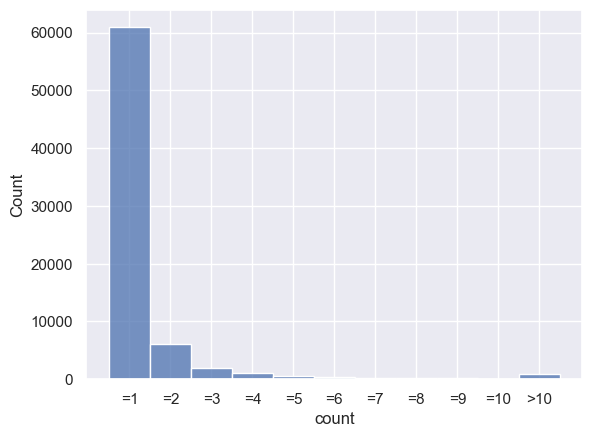

In [7]:
'''
Are there a lot of job titles with very low counts?
Yes - 84.0% of job titles appear only once, 8.31% appear twice, and 2.60% appear three times.
Let's decide that job titles that appear at least 5 times are normalized.
'''
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf]
labels = ['=1', '=2', '=3', '=4', '=5', '=6', '=7', '=8', '=9', '=10', '>10']
counts = pd.cut(df_jobs['title'].value_counts(), bins=bins, labels=labels)
display(sns.histplot(counts))
pd.concat([counts.value_counts(),counts.value_counts(normalize=True)*100], keys=['count', '%'], axis=1)


## Normalize Job Titles with Sentence BERT Encodings

In [8]:
# How we evaluate: We do an eye test on a sample of 100 normalized job titles of count < 10
counts = df_jobs['title'].value_counts()
val_titles = list(counts[counts < 10].sample(100, random_state=42).index)
val_titles

['Partner Marketing Specialist',
 'A&P Technician',
 'Chassis Lead Engineer [5449]',
 'Fleet Mechanic',
 'International Financial Controller',
 'Research Data Analyst',
 'Manager Account Management',
 'Creative Lead, Presentation Design',
 'Signing Agent - Palm Springs, California',
 'Legal Coordinator',
 'Nurse Manager - Emergency Room',
 'Registered Nurse - Effingham',
 'Urgent Care Technician Training Program – Apply Today!',
 'Epicor Developer',
 '2024-2025 GENERAL RESOURCE TEACHER - SILVESTRI JHS',
 'Vice President of Asset & Property Management',
 'Media Coordinator',
 'Senior Director, Local Performance Marketing',
 'Travel RRT - Job Id: JO03716440',
 'Senior Corporate Counsel, M&A',
 'Client Director',
 'Certified Nursing Assistant - Behavioral Health',
 'Radio Frequency Millimeter-Wave Engineer IV',
 'Registered Nurse Pediatric Homecare',
 'Associate, Corporate Development',
 'Travel Nurse RN - ICU/Critical Care - $2,436 per week in Perth Amboy, NJ',
 'Manufacturing Associate 

In [ ]:
class TitleNormModel:
    def __init__(self, norm_titles: list[str]):
        self.sent_transformer = salary.SentenceBertEncoder()
        self.norm_titles = norm_titles
        self.norm_title_embeddings = self.sent_transformer.encode(norm_titles)
    
    def normalize(self, titles: list[str]):
        title_embeddings = self.sent_transformer.encode(titles)
        similarities = self.sent_transformer.similarity(title_embeddings, self.norm_title_embeddings)
        idxs = similarities.argmax(1)
        return np.array(self.norm_titles)[idxs]

In [10]:
def get_norm_titles(min_count: int):
    return list(df_jobs['title'].value_counts()[df_jobs['title'].value_counts() >= min_count].index)

def print_validation_title_mapping(model: TitleNormModel):
    val_title_mapping = { val_title: norm_title for (val_title, norm_title) in zip(val_titles, model.normalize(val_titles)) }
    print("Validation title mapping:")
    print("----------------------------")
    for title, norm_title in val_title_mapping.items():
        print(f"{title} -> {norm_title}")

In [11]:
norm_titles = get_norm_titles(10)
print('Number of norm titles', len(norm_titles))
model_10 = TitleNormModel(norm_titles)
print_validation_title_mapping(model_10)

Number of norm titles 1051
Validation title mapping:
----------------------------
Partner Marketing Specialist -> Marketing Specialist
A&P Technician -> Auto Body Technician
Chassis Lead Engineer [5449] -> Principal Engineer
Fleet Mechanic -> Mechanic
International Financial Controller -> Financial Controller
Research Data Analyst -> Data Analyst
Manager Account Management -> Account Manager
Creative Lead, Presentation Design -> Instructional Designer
Signing Agent - Palm Springs, California -> Financial Contract Analyst – Overland Park KS
Legal Coordinator -> Legal Secretary
Nurse Manager - Emergency Room -> Nursing Manager
Registered Nurse - Effingham -> Registered Nurse
Urgent Care Technician Training Program – Apply Today! -> Patient Care Technician
Epicor Developer -> Developer
2024-2025 GENERAL RESOURCE TEACHER - SILVESTRI JHS -> TEACHER-SCIENCE
Vice President of Asset & Property Management -> Vice President of Business Development
Media Coordinator -> Communications Manager
Seni

In [12]:
norm_titles = get_norm_titles(20)
print('Number of norm titles', len(norm_titles))
model_10 = TitleNormModel(norm_titles)
print_validation_title_mapping(model_10)

Number of norm titles 457
Validation title mapping:
----------------------------
Partner Marketing Specialist -> Marketing Specialist
A&P Technician -> Auto Body Technician
Chassis Lead Engineer [5449] -> Senior Mechanical Engineer
Fleet Mechanic -> Mechanic
International Financial Controller -> Financial Controller
Research Data Analyst -> Data Analyst
Manager Account Management -> Account Manager
Creative Lead, Presentation Design -> User Experience Designer
Signing Agent - Palm Springs, California -> Talent Acquisition Specialist
Legal Coordinator -> Legal Secretary
Nurse Manager - Emergency Room -> Emergency Room Registered Nurse
Registered Nurse - Effingham -> Registered Nurse
Urgent Care Technician Training Program – Apply Today! -> Patient Care Technician
Epicor Developer -> Developer
2024-2025 GENERAL RESOURCE TEACHER - SILVESTRI JHS -> TEACHER-SCIENCE
Vice President of Asset & Property Management -> Vice President of Sales
Media Coordinator -> Communications Specialist
Senior 

In [13]:
norm_titles = get_norm_titles(40)
print('Number of norm titles', len(norm_titles))
model_10 = TitleNormModel(norm_titles)
print_validation_title_mapping(model_10)

Number of norm titles 160
Validation title mapping:
----------------------------
Partner Marketing Specialist -> Marketing Coordinator
A&P Technician -> Maintenance Technician
Chassis Lead Engineer [5449] -> Automotive Technician
Fleet Mechanic -> Maintenance Technician
International Financial Controller -> Financial Controller
Research Data Analyst -> Data Analyst
Manager Account Management -> Account Manager
Creative Lead, Presentation Design -> Graphic Designer
Signing Agent - Palm Springs, California -> Mortgage Loan Officer
Legal Coordinator -> Legal Assistant
Nurse Manager - Emergency Room -> Registered Nurse (RN)
Registered Nurse - Effingham -> Registered Nurse
Urgent Care Technician Training Program – Apply Today! -> Patient Care Technician
Epicor Developer -> Back End Developer
2024-2025 GENERAL RESOURCE TEACHER - SILVESTRI JHS -> TEACHER-SCIENCE
Vice President of Asset & Property Management -> Sales Director
Media Coordinator -> Production Supervisor
Senior Director, Local Pe

In [14]:
norm_titles = get_norm_titles(80)
print('Number of norm titles', len(norm_titles))
model_10 = TitleNormModel(norm_titles)
print_validation_title_mapping(model_10)

Number of norm titles 64
Validation title mapping:
----------------------------
Partner Marketing Specialist -> Sales Specialist
A&P Technician -> Maintenance Technician
Chassis Lead Engineer [5449] -> Manufacturing Engineer
Fleet Mechanic -> Maintenance Technician
International Financial Controller -> Financial Analyst
Research Data Analyst -> Data Analyst
Manager Account Management -> Account Manager
Creative Lead, Presentation Design -> Business Development Representative
Signing Agent - Palm Springs, California -> Mortgage Loan Officer
Legal Coordinator -> Associate Attorney
Nurse Manager - Emergency Room -> Registered Nurse
Registered Nurse - Effingham -> Registered Nurse
Urgent Care Technician Training Program – Apply Today! -> Patient Care Technician
Epicor Developer -> Software Engineer
2024-2025 GENERAL RESOURCE TEACHER - SILVESTRI JHS -> Human Resources Generalist
Vice President of Asset & Property Management -> Sales Executive
Media Coordinator -> Operations Manager
Senior D

## Normalize Job Titles

Eye-balling the mappings on accuracy, we believe that the mappings with min job title count threshold of 10 would be the best.

We normalize job titles of jobs_clean.csv with this best model.

In [15]:
jobs_clean = pd.read_csv('data/jobs_clean.csv')
jobs_clean

,job_id,title,location,location_state,description,formatted_work_type,formatted_experience_level,remote_allowed,company_industries,company_country,company_state,company_city,company_description,company_employee_count,normalized_salary,normalized_salary_log10,min_salary,max_salary,med_salary,pay_period
0,921716,Marketing Coordinator,"Princeton, NJ",NJ,Job descriptionA leading real estate firm in N...,Full-time,Unknown,0.0,Real Estate,US,NJ,Jersey City,With years of experience helping local buyers ...,402.0,38480.0,4.585235,17.0,20.0,NaN,HOURLY
1,1829192,Mental Health Therapist/Counselor,"Fort Collins, CO",CO,"At Aspen Therapy and Wellness , we are committ...",Full-time,Unknown,0.0,NaN,Unknown,Unknown,Unknown,NaN,NaN,83200.0,4.920123,30.0,50.0,NaN,HOURLY
2,10998357,Assitant Restaurant Manager,"Cincinnati, OH",OH,The National Exemplar is accepting application...,Full-time,Unknown,0.0,Restaurants,US,Ohio,Mariemont,"In April of 1983, The National Exemplar began ...",15.0,55000.0,4.740363,45000.0,65000.0,NaN,YEARLY
3,23221523,Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",NY,Senior Associate Attorney - Elder Law / Trusts...,Full-time,Unknown,0.0,Law Practice,US,New York,Lake Success,"Abrams Fensterman, LLP is a full-service law f...",222.0,157500.0,5.197281,140000.0,175000.0,NaN,YEARLY
4,35982263,Service Technician,"Burlington, IA",IA,Looking for HVAC service tech with experience ...,Full-time,Unknown,0.0,NaN,Unknown,Unknown,Unknown,NaN,NaN,70000.0,4.845098,60000.0,80000.0,NaN,YEARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,3906265414,Contract Administrator,"Irvine, CA",CA,"Position: Clinical Contracts Analyst, Req#: 63...",Contract,Mid-Senior level,0.0,Staffing and Recruiting,US,MA,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,35.0,45.0,NaN,HOURLY
34853,3906266165,Catering Event Manager,Greater Indianapolis,Unknown,This role handles all the onsite catering and ...,Part-time,Associate,0.0,Staffing and Recruiting,US,Indiana,Indianapolis,Athena Recruiting provides recruitment service...,5.0,57500.0,4.759668,50000.0,65000.0,NaN,YEARLY
34854,3906266272,Quality Engineer,"Irvine, CA",CA,Position: Quality Engineer I (Complaint Invest...,Contract,Mid-Senior level,0.0,Staffing and Recruiting,US,MA,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,30.0,50.0,NaN,HOURLY
34855,3906267117,Title IX/Investigations Attorney,"Walnut Creek, CA",CA,Our Walnut Creek office is currently seeking a...,Full-time,Mid-Senior level,0.0,Law Practice,US,California,Fresno,"For more than 30 years, Lozano Smith has serve...",185.0,157500.0,5.197281,120000.0,195000.0,NaN,YEARLY


In [16]:
jobs_clean['norm_title'] = model_10.normalize(list(jobs_clean['title']))
jobs_clean

,job_id,title,location,location_state,description,formatted_work_type,formatted_experience_level,remote_allowed,company_industries,company_country,...,company_city,company_description,company_employee_count,normalized_salary,normalized_salary_log10,min_salary,max_salary,med_salary,pay_period,norm_title
0,921716,Marketing Coordinator,"Princeton, NJ",NJ,Job descriptionA leading real estate firm in N...,Full-time,Unknown,0.0,Real Estate,US,...,Jersey City,With years of experience helping local buyers ...,402.0,38480.0,4.585235,17.0,20.0,NaN,HOURLY,Sales Manager
1,1829192,Mental Health Therapist/Counselor,"Fort Collins, CO",CO,"At Aspen Therapy and Wellness , we are committ...",Full-time,Unknown,0.0,NaN,Unknown,...,Unknown,NaN,NaN,83200.0,4.920123,30.0,50.0,NaN,HOURLY,Physical Therapist
2,10998357,Assitant Restaurant Manager,"Cincinnati, OH",OH,The National Exemplar is accepting application...,Full-time,Unknown,0.0,Restaurants,US,...,Mariemont,"In April of 1983, The National Exemplar began ...",15.0,55000.0,4.740363,45000.0,65000.0,NaN,YEARLY,ASSISTANT STORE MANAGER
3,23221523,Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",NY,Senior Associate Attorney - Elder Law / Trusts...,Full-time,Unknown,0.0,Law Practice,US,...,Lake Success,"Abrams Fensterman, LLP is a full-service law f...",222.0,157500.0,5.197281,140000.0,175000.0,NaN,YEARLY,Associate Attorney
4,35982263,Service Technician,"Burlington, IA",IA,Looking for HVAC service tech with experience ...,Full-time,Unknown,0.0,NaN,Unknown,...,Unknown,NaN,NaN,70000.0,4.845098,60000.0,80000.0,NaN,YEARLY,Service Technician
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,3906265414,Contract Administrator,"Irvine, CA",CA,"Position: Clinical Contracts Analyst, Req#: 63...",Contract,Mid-Senior level,0.0,Staffing and Recruiting,US,...,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,35.0,45.0,NaN,HOURLY,Operations Manager
34853,3906266165,Catering Event Manager,Greater Indianapolis,Unknown,This role handles all the onsite catering and ...,Part-time,Associate,0.0,Staffing and Recruiting,US,...,Indianapolis,Athena Recruiting provides recruitment service...,5.0,57500.0,4.759668,50000.0,65000.0,NaN,YEARLY,Sales Manager
34854,3906266272,Quality Engineer,"Irvine, CA",CA,Position: Quality Engineer I (Complaint Invest...,Contract,Mid-Senior level,0.0,Staffing and Recruiting,US,...,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,30.0,50.0,NaN,HOURLY,Quality Engineer
34855,3906267117,Title IX/Investigations Attorney,"Walnut Creek, CA",CA,Our Walnut Creek office is currently seeking a...,Full-time,Mid-Senior level,0.0,Law Practice,US,...,Fresno,"For more than 30 years, Lozano Smith has serve...",185.0,157500.0,5.197281,120000.0,195000.0,NaN,YEARLY,Associate Attorney


In [27]:
# Mesure the cardinality improvement after normalization
pd.DataFrame({
    'cardinality': [len(jobs_clean['title'].value_counts()), len(jobs_clean['norm_title'].value_counts())],
    'percentage (%)': [len(jobs_clean['title'].value_counts())/len(jobs_clean)*100, len(jobs_clean['norm_title'].value_counts())/len(jobs_clean)*100]
}, index=['title', 'norm_title']) 

,cardinality,percentage (%)
title,24137,69.245776
norm_title,62,0.177870


In [17]:
jobs_clean.to_csv('data/jobs_clean_nt.csv', index=False)